#### Install libraries

In [ ]:
# !pip install pillow -> install PIL library

#### Import necessary libraries

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#### Computes the histogram of pixel intensities in the input image

In [2]:
def calculate_histogram(image_array):
    hist, _ = np.histogram(image_array.flatten(), bins=256, range=(0, 255))
    return hist

#### Calculates the probability of each intensity value in the histogram

In [3]:
def calculate_probability(histogram, total_pixels):
    return histogram / total_pixels

#### Computes the cumulative distribution function (CDF) for the pixel intensities

In [4]:
def calculate_cdf(probability_matrix):
    return np.cumsum(probability_matrix)

#### Maps old pixel intensity values to new values using the CDF and total intensity levels (256)

In [5]:
def map_pixel_values(cdf, intensity_levels):
    return np.round((intensity_levels - 1) * cdf).astype(int)

#### Plots the original and equalized histograms alongside their respective images.

In [6]:
def plot_histograms_and_images(original_image, transformed_image, original_hist, transformed_hist):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Plot original histogram
    axes[0, 0].bar(range(256), original_hist, color='blue', alpha=0.7)
    axes[0, 0].set_title("Original Histogram")
    axes[0, 0].set_xlabel("Pixel Intensity")
    axes[0, 0].set_ylabel("Frequency")

    # Plot equalized histogram
    axes[0, 1].bar(range(256), transformed_hist, color='green', alpha=0.7)
    axes[0, 1].set_title("Equalized Histogram")
    axes[0, 1].set_xlabel("Pixel Intensity")
    axes[0, 1].set_ylabel("Frequency")

    # Display original image
    axes[1, 0].imshow(original_image, cmap='gray')
    axes[1, 0].set_title("Original Image")
    axes[1, 0].axis('off')

    # Display transformed image
    axes[1, 1].imshow(transformed_image, cmap='gray')
    axes[1, 1].set_title("Equalized Image")
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

#### Steps:
<ol>
    <li>Load the input image and convert it to grayscale.</li>
    <li>Compute the histogram of the original image.</li>
    <li>Calculate probabilities and CDF for pixel intensities.</li>
    <li>Map original pixel values to new values using the CDF.</li>
    <li>Compute the histogram of the transformed image.</li>
    <li>Convert the transformed array into a new image.</li>
    <li>Plot the original and transformed histograms and images.</li>
    <li>Returns the equalized image.</li>
</ol>

In [7]:
def apply_histogram_equalization(image_path):
    # Load the image and convert it to grayscale
    original_image = Image.open(image_path).convert('L')
    image_array = np.array(original_image)

    # Calculate the original histogram
    original_hist = calculate_histogram(image_array)

    # Calculate probabilities and CDF
    total_pixels = image_array.size
    probability = calculate_probability(original_hist, total_pixels)
    cdf = calculate_cdf(probability)

    # Map pixel values
    pixel_mapping = map_pixel_values(cdf, intensity_levels=256)
    transformed_image_array = pixel_mapping[image_array]

    # Calculate the transformed histogram
    transformed_hist = calculate_histogram(transformed_image_array)

    # Convert transformed array back to image
    transformed_image = Image.fromarray(transformed_image_array.astype(np.uint8))  # Convert to 8-bit pixels

    # Plot histograms and images
    plot_histograms_and_images(original_image, transformed_image, original_hist, transformed_hist)

    return transformed_image

#### Save the equalized images

In [8]:
input_folder = "./low contrast images"
output_folder = "./high contrast images"
os.makedirs(output_folder, exist_ok=True)

In [ ]:
"C:\Users\Tarahan IT\Desktop\Image Processing\low contrast images\1.png"

#### Result Visualization

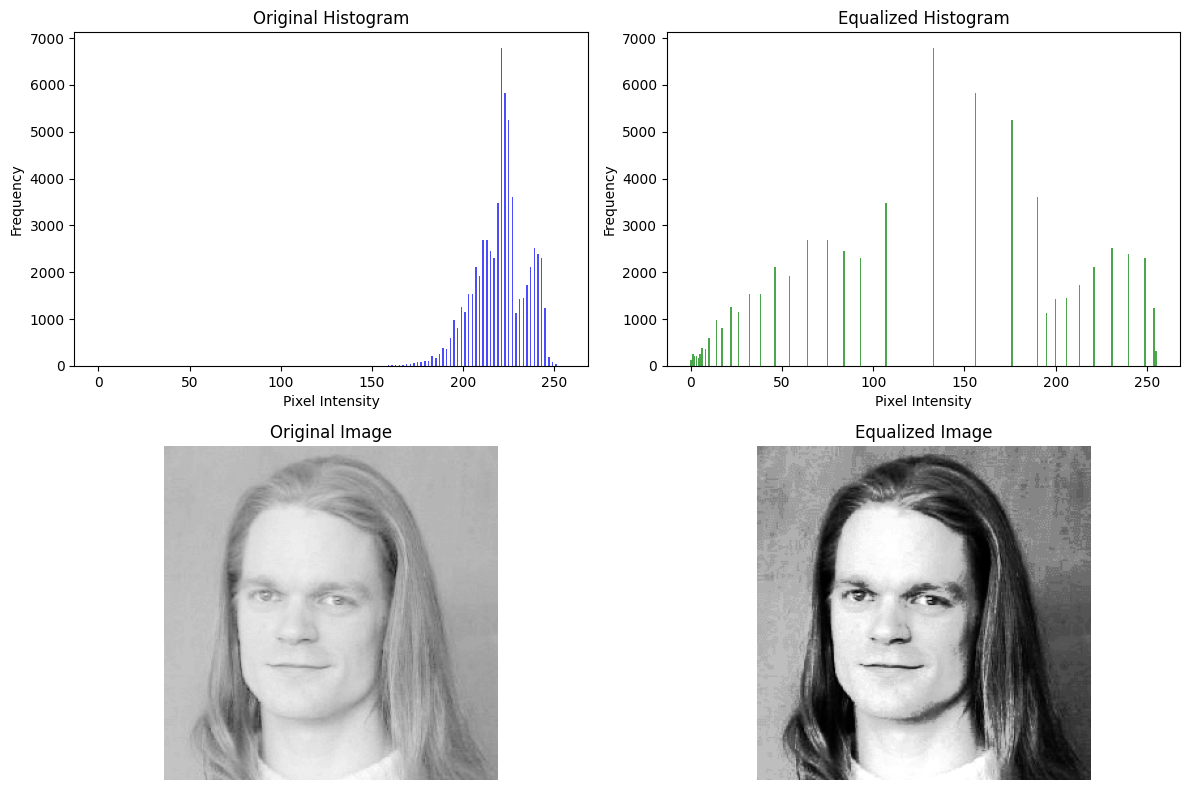

Processed 1.png -> ./high contrast images\equalized_1.png






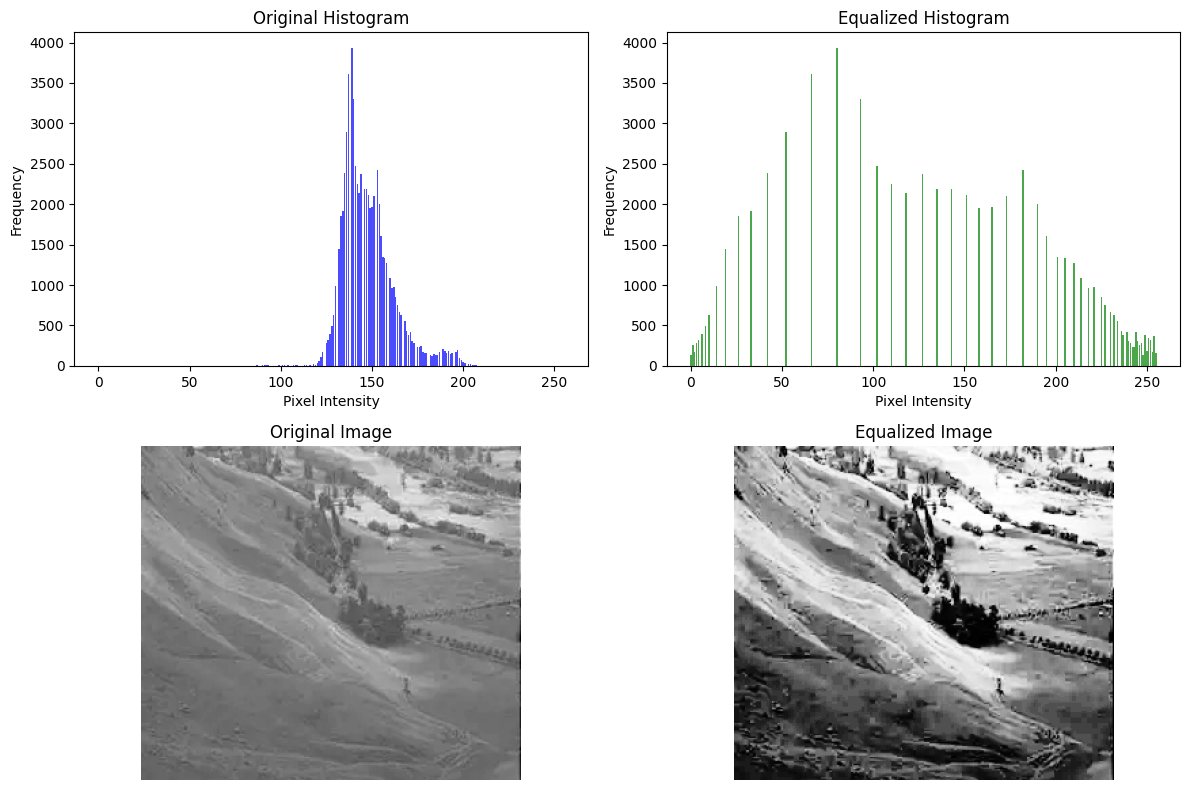

Processed 2.png -> ./high contrast images\equalized_2.png






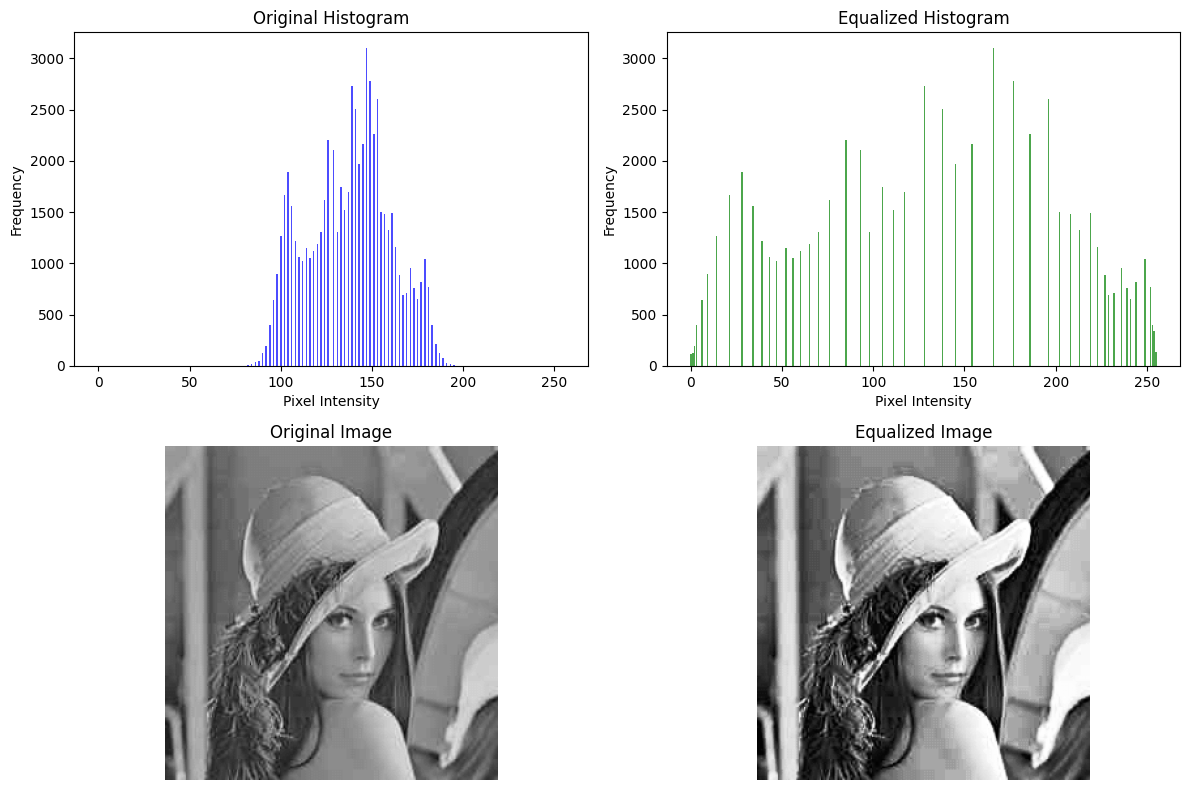

Processed 3.png -> ./high contrast images\equalized_3.png






In [9]:
for image_file in os.listdir(input_folder):
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        input_path = os.path.join(input_folder, image_file)
        output_path = os.path.join(output_folder, f"equalized_{image_file}")

        # Apply histogram equalization and save the result
        equalized_image = apply_histogram_equalization(input_path)
        equalized_image.save(output_path)
        print(f"Processed {image_file} -> {output_path}")
        print("\n\n\n")